# Formación y Evolución de Galaxias

## Breve introducción a matplotlib

## Objetivos

- Introducir la visualización de datos utilizando la librería matplotlib de python.


## Matplotlib

¿Qué es matplotlib?  

Es una librería de python más, pero muy usada para la visualización de datos. Basada en el lenguaje matlab, contiene una gran cantidad de *clases* y *métodos* para hacer gráficos. Vamos a basarnos en este librería para introducirnos en la visualización de datos con python. En el menú Help de la barra de menúes pueden acceder a la documentación. De particular interés es su galería de gráficos, de donde pueden obtener ideas de visualización, o respuestas a lo que quieren implementar.

- Galería de gráficos de matplotlib:  https://matplotlib.org/3.1.1/gallery/index.html

In [ ]:
# Importamos la librería:

import matplotlib.pyplot as plt  # recordemos que plt es solo una manera de abreviar lo anterior
import numpy as np # también importamos numpy porque lo vamos a usar


El objeto pyplot de matplotlib es un módulo que contiene todas las funcionalidades (metodos) asociados a 
los gráficos, y lo abreviamos con plt (es la manera más usual de hacerlo, pero puede tomar otros nombres, el que uno le quiera dar. 

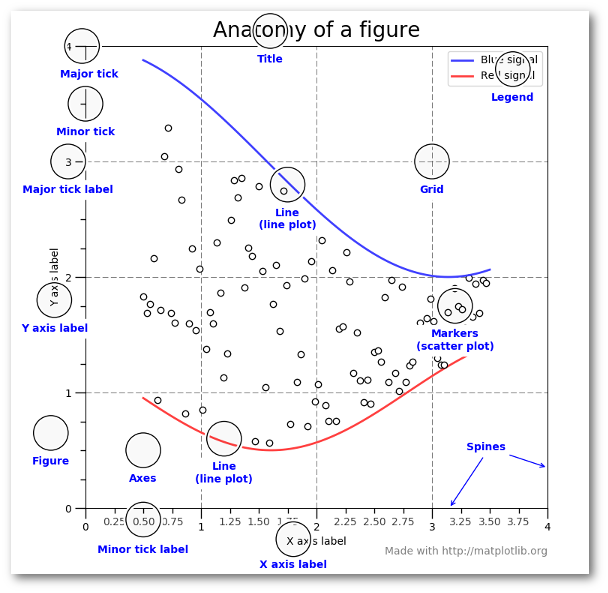

**Fig 1:** Example of a figure using matplotlib. The figure contains a title (at the top center), a graphic with a set of axis, and some data visualized. Big black circles point to the different elements that can appear in a figure.

### Primer gráfico con matplotlib

Para aquellos acostumbrados a usar GNUPLOT, una característica de python que lo distingue de entrada es que 
con python debemos definir tanto la ordenada a graficar como la absisa. Mientras que en GNUPLOT podemos definir directamente una función y al graficarla el dominio se elige automáticamente y se grafica, en python, y en matplotlib en particular, hay que brindar un dominio discreto de entrada.

In [ ]:
# definimos dos vectores para graficarlos
x = np.linspace(0,10,1000)
y = np.cos(np.pi*x)+x

El método más sencillo a utilizar es *plot*. Pueden encontrar información útil en:

https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
plt.plot(x,y)#, '-b', lw=2)

plt.show()


**Fig. 2:** Example of a simple figure. If not specified, python assumes the style.

### Paradigmas de graficación

Existen diferentes modos o "paradigmas" para realizar gŕaficos usando matplotlib. Como vimos, el módulo pyplot cuenta con métodos para realizar gráficos rápidamente. Sin embargo, no es la única manera de hacerlo.
Nosotros vamos a utilizar el modo que explota la orientación a objetos de mejor manera, que hace uso del método subplots() del módulo pyplot(plt), que se encarga de administrar gráficos. --> plt.subplots(). 


In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(x,y, '-b', lw=2)
plt.show()

**Fig. 3:** Example of a figure using the method pyplot.subplots. 

Hay muchas herramientas para mejorar la estética del gráfico, e incluso manipular hasta el más ínfimo detalle.
Hacia el final de la práctica vamos a ver varias herramientas para cambiar el estilo del gráfico (colores, tamaños, tipografía ..)

In [ ]:
fig, ax = plt.subplots(1,1)
# modificar caracteristicas del grafico
ax.set_title('Cosenusoide boreal',fontsize=15) 
ax.set_xlabel('x',fontsize=13)
ax.set_ylabel(r'$\rm cos(\pi x)+x$',fontsize=13) # soporta latex
ax.set_xlim([0,11])
ax.set_ylim([0,11])

#algunos colores con nombres en: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
ax.plot(x, y, '--', color='tab:green', lw=2)

ax.plot(x,y+2, '-.', color='darkorange', lw=3) # operaciones dentro del argumento

plt.show()

**Fig. 4:** Cosenusoide boreal. Los valores de la variable $x$ van del $0$ al $11$. La línea verde a trazos representa la función $\rm cos(\pi x)+x$, mientras que la línea naranja a trazos punteada muestra los valores que toma la función $\rm cos(\pi x)+x + 2$.

Obviamente se pueden realizar graficos con puntos únicamente, o combinaciones.

In [ ]:
x = np.arange(-4,4,0.4)
print(x, len(x))
y = np.exp(-x**2)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(x,y, 's--', color='royalblue', ms=6)
ax.plot(x,y+1, 'o-', color='purple', ms=10, lw=2)

ax.text(-4,0.5, 'gauseanas', fontsize=15) # texto dentro de la figura

plt.show()

**Fig. 5:** Ejemplo de dos funciones gauseanas. En azul (línea a trazos y símbolos cuadrados) se muestra la función $e^{-x^2}$, mientras que el violeta (línea sólida y símbolos circulares) se representa la función $e^{-x^2}+1$.

## Barras de error
Otro tipo de grafico útil es con datos que tienen errores estimados

In [ ]:
x = np.linspace(0,10,30)
y = np.sin(x)
err = np.random.rand(30) # numeros aleatorios entre 0 y 1 con distribucion aleatoria (divido 10)

print('')
print(y)
print('')
print(err)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.errorbar(x,y,yerr=err, xerr=None, fmt='-', color='#11270b', lw=3, ecolor='#3A015C', elinewidth=3)
#, capsize=4, capthick=2)
# chequear mas argumentos posibles

#ax.fill_between(x,y+err, y-err, alpha=0.15, edgecolor='#3A015C', facecolor='#11270b')

plt.show()

**Fig 6:** Ejemplo de función con barras de error. Notar que el estilo de las barras es independiente al estilo de la línea.

# Quedate en casa

A veces queremos graficar varios órdenes de magnitud en un mismo plot. Utilizamos escala logarítmica en los ejes.

In [ ]:
semanas = np.arange(40)
casos = 0.25*np.exp(0.5*semanas)
sitequedas = 200*semanas


In [ ]:
fig, ax = plt.subplots(1,1)
#ax.set_yscale('log')
ax.set_ylabel('Casos de coronavirus')
ax.set_xlabel('Semanas')

ax.plot(semanas, casos, '-', lw=2, label='Casos')
ax.plot(semanas, sitequedas, '--', lw=2, label='Si te quedas en casa')

ax.legend()
plt.show()

**Fig. 7:** Casos positivos de coronavirus en función de las semanas transcurridas desde la aparición del primer caso. La línea azul sólida indica la proyección de casos totales sin mediar ninguna medida (función exponencial). La línea naranja a trazos muestra la proyección del número de casos con reducción total de la movilidad (función lineal).  

# Histogramas

Numpy tiene una herramienta para calcular histogramas (la frecuencia con la que aparecen valores en cierto rango).

In [ ]:
x = np.random.normal(loc=3,scale=2, size=1000)  # genero 1000 puntos aleatorios con distribución normal

hist, bin_edges = np.histogram(x, bins=30)#, range=[0,4])

print('Histograma: ', hist)
print('Bordes: ', bin_edges)
print(hist.shape)
print(bin_edges.shape)

Si sólo queremos visualizar el histograma de valores, Matplotlib ya tiene una herramienta que permite realizar el gráfico, y tiene prácticamente los mismos argumentos que la función de numpy + los necesarios para realizar el gráfico.

In [ ]:
fig, ax = plt.subplots(1,1)

# tipos de histogramas: 'bar', 'step', 'stepfilled', 'barstacked'
ax.hist(x, bins=30, histtype='bar', edgecolor='black', facecolor='#f4acb7', label='Datos A') # buscar otros kwords
ax.hist(x+3, bins=50, histtype='step', linestyle='--', edgecolor='darkblue', lw=4, label='Datos B')

ax.legend(loc='upper right', fontsize=15)

plt.show()

**Fig. 8:** Ejemplo de visualización de histograma. El histograma rosa (lleno) muestra los Datos A, mientras que el hitograma azul (borde) representa los Datos B.

### Histogramas comparando distribuciones

Se puede obtener la densidad de probabilidad de los valores, que es útil para comparar entre muestras con diferente cantidad de datos.

In [ ]:
x = np.random.normal(loc=3, scale=2, size=10000)
y = np.random.normal(loc=5, scale=1, size=2000)

fig, ax = plt.subplots(1,1)

# tipos de histogramas: 'bar', 'step', 'stepfilled', 'barstacked'
ax.hist(x, bins=30, histtype='bar', edgecolor='black', facecolor='#50c9ce')#, density=True)
ax.hist(y, bins=30, histtype='step', edgecolor='darkblue', lw=3)#, density=True)


plt.show()

**Fig. 9:** Ejemplo de las distintas formas de presentar un histograma. Al cambiar los argumentos del método hist() se puede observar las diferencias.

#### *Importante*
Notar que la normalización no es a la unidad, sino que el argumento *density* asegura que la integral debajo de la envolvente del histograma sea 1.  ¿Cómo harían para normalizar a 1? Ver ejercicio 2 de la práctica. 

# Contornos

Los gráficos de contornos son útiles cuando queremos visualizar la densidad de una distribución de puntos. 

"Una línea de contorno o isolínea de una función de dos variables es una curva en la que la función toma un valor constante"

Acá veremos un tipo de gráfico de contorno, a partir de realizar un histograma 2D de una distribución de datos. Para ver otros tipos de gráficos de contornos, ver: 

https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.contour.html
https://python-graph-gallery.com/2d-density-plot/


In [ ]:
# Genero 2 distribuciones gausseanas 
x = np.random.normal(loc=3, scale=5, size=10000)
y = np.random.normal(loc=5, scale=3, size=10000)
x2 = np.random.normal(loc=-5, scale=5, size=10000)
y2 = np.random.normal(loc=-1, scale=3, size=10000)

datax = np.append(x,x2)
datay = np.append(y,y2)

# hace una "grilla" y cuenta cuantos puntos hay en cada celda.
H, xedges, yedges = np.histogram2d(datax,datay, bins=30)#, range=[[-20,15],[-10,10]]) 
# Devuelve una "matriz"

# Los bordes de la grilla tienen una dimensión más, sacamos el punto medio.
xplot = (xedges[:-1]+xedges[1:])*0.5 
yplot = (yedges[:-1]+yedges[1:])*0.5

In [ ]:
fig, ax = plt.subplots(1,1)

# niveles de densidad=30
# colormaps: https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html

#CUANDO HACEMOS GRÁFICOS DE CONTORNO, LA ESTRUCTURA DE DATOS QUE DEVUELVE LA FUNCION NP.HISTOGRAM ES 
#LA MATRIZ TRASPUESTA DE LA ESTRUCTURA DE DATOS QUE ESPERAN LAS FUNCIONES CONTOUR Y CONTOURF DE MATPLOTLIB.

#HACER H.T (las matrices tienen el método de trasposición asociado)

ax.contour(xplot, yplot, H.T, 7, cmap='Paired')
#ax.contourf(xplot, yplot, H.T, 7, cmap='Paired')
#cm = ax.contourf(xplot, yplot, H.T, 7, cmap='Paired')
#cm = ax.contourf(xplot, yplot, H.T, 7, cmap='jet')

#plt.colorbar(cm)

plt.show()

**Fig. 10:** Visualización de distribuciones utilizando contornos con el método pyplot.contour. 

## Histograma 2D
Una versión alternativa para visualizar densidades de puntos son los histogramas 2D. Se definen regiones cuadradas (o hexagonales), y se designa un color dentro de un mapa de colores, según la densidad de puntos dentro de la región.  

In [ ]:
fig, ax = plt.subplots(1,1)

ax.hist2d(datax, datay, bins=30)
#ax.hexbin(datax, datay, gridsize=30)

plt.show()

**Fig. 11:** Representando una distribución de datos utilizando Histogramas en 2D (método pyplot.hist2d).

# Scatter plots

In [ ]:
x = np.random.normal(loc=3, scale=5, size=100)
y = np.random.normal(loc=5, scale=3, size=100)

color= x+y

fig, ax = plt.subplots(1,1, figsize=(6,4))


# los colores de los puntos de scatter pueden variar según alguna propiedad o escala que le adjudiquemos 
cmap = 'viridis'  # y estos colores varían según un color map asignado

# el size del método scatter no es la misma escala que el método plot

ax.scatter(x, y, s=35, marker='o', c=color, cmap=cmap)

# AGREGANDO UNA BARRA DE REFERENCIA
#cm = ax.scatter(x, y, s=35, marker='o', c=color, cmap=cmap)
#cbar = plt.colorbar(cm, pad=0.04)
#cbar.set_label(r'$x+y$',fontsize=15, labelpad=9)

ax.set_ylabel('Y (Gaussian)')
ax.set_xlabel('X (Gaussian)')

plt.show()

**Fig. 12:** Representación de una distribución de datos utilizando el método pyplot.scatter.

In [ ]:
#help de scatter
help(ax.scatter)

## Grabar plots en el disco rígido 
Si queremos guardar el plot en el disco, simplemente usamos el método savefig del modulo pyplot.  Esta función tiene un único argumento obligatorio, el path, y logra inferir el tipo de archivo de salida según la extensión (jpg, png , pdf...)  

In [ ]:
# suponiendo que existe una carpeta 'plots' en el directorio donde está este notebook
fig, ax = plt.subplots(1,1, figsize=(7,4))


# los colores de los puntos de scatter pueden variar según alguna propiedad o escala que le adjudiquemos 
cmap = 'viridis'  # y estos colores varían según un color map asignado

# el size del método scatter no es la misma escala que el método plot

cm = ax.scatter(x, y, s=35, marker='o', c=color, cmap=cmap)

cbar = plt.colorbar(cm, pad=0.04)
cbar.set_label(r'$x+y$',fontsize=15, labelpad=9)

ax.set_ylabel(r'$Y ({\rm Gaussian})$', fontsize=15)
ax.set_xlabel(r'$X ({\rm Gaussian})$', fontsize=15)

path = './plots/scatter-test.pdf'

#Una función útil para que todo quede en su lugar al grabar a archivo es tight_layout(). 
#Simplemente llamándola antes de grabar el plot al disco, ajusta las cosas para todo entre dentro de la figure.

plt.tight_layout()
plt.savefig(path)
plt.show()


**Fig. 13:** Ejemplo de figura con una barra incorporada. La misma referencia una tercera componente para visualizar las propiedades de la distribución de datos. Esta figura también es guardada en el disco rígido de la computadora.

También podemos ajustar otras cosas cuando salvamos un plot, a partir de sus argumentos, como la cantidad de dpi, pulgadas, y otras cuestiones. Explorar los argumentos.  

savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Estetica

### rcParams
La librería matplotlib cuenta con el método rcParams, con el cual se pueden configurar todos los elementos de los axes. Una vez ejecutada la celda con los cambios en rcParams, van a quedar de esa manera hasta que volvamos a setearlos. Tener presente la anatomía de una figura, presentada más arriba. 

In [ ]:
import matplotlib as mpl

x = np.arange(30)
y = np.random.uniform(size=30)

## Cambio de parámetros
mpl.rcParams['axes.linewidth'] = 2.0
#mpl.rcParams['font.serif'] = ['Liberation Serif']
mpl.rcParams['font.size'] = 15
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
#mpl.rcParams['xtick.direction'] = 'in'
#mpl.rcParams['ytick.direction'] = 'in'
#mpl.rcParams['xtick.major.width']= 2.0
#mpl.rcParams['xtick.major.size']= 5.0
#mpl.rcParams['xtick.minor.width']= 1.0
#mpl.rcParams['xtick.minor.size']= 3.0
mpl.rcdefaults()



## PLOT
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_xlabel('X')
ax.set_ylabel('Uniform data')

ax.plot(x,y,'o', ms=8, color='#3e885b', label='Uniforme')

ax.legend(loc='lower left')


#plt.tight_layout()
#fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

#plt.savefig('./plots/Fig1.pdf')
#plt.savefig('./plots/Fig2.png', dpi=400)

plt.show()

**Fig. 14:** Distribución uniforme, con valores de $x$ en el intervalo $[0, 30]$.

### Colores
Existen tres maneras de definir colores en matplotlib. 

- Colores por nombre 
    - https://matplotlib.org/3.1.0/gallery/color/named_colors.html 
    - Colores abreviados : b: blue
      g: green
      r: red
      c: cyan
      m: magenta
      y: yellow
      k: black
      w: white
- Ciclado de colores siguiendo un colormap
    - Colormaps disponibles: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
- Colores en código RGB 
- Colores en código HEX


In [ ]:
#Muchas veces los RGB los vamos a ver en el intervalo [0-255]
def normRGB(r,g,b):

    return r/255, g/255, b/255

r, g, b = normRGB(203,121,58)

print('r, g, b' , r, g, b)

fig, ax = plt.subplots(1,3, figsize=(15,4))

ax[0].plot(.5,.5, markersize=100, marker='s', color='tomato') #Color por nombre
ax[1].plot(.5,.5, markersize=100, marker='o', color=(r,g,b)) # RGB - Tupla, con valores en el intervalo [0-1]
ax[2].plot(.5,.5, markersize=100, marker='^', color='#321325') # HEX
plt.show()

**Fig. 15:** Ejemplo de figura con varios sets de ejes. *Panel izquierdo*: el color del cuadrado lo damos con el nombre del color. *Panel central*: el color del círculo está dado con colores RGB. *Panel derecho*: el triángulo se colorea utilizando los colores #HEX.

Los colores combinan, no es sólo una cuestión de gustos. Existe una teoría de los colores, que en base a ciertos preceptos, determina qué combinaciones se complementan de mejor manera. Cuando tenemos que graficar muchas líneas en un mismo gráfico, es fundamental que los colores no se confundan y es donde más a la vista queda cuando los colores son elegidos aleatoriamente.   

Buena página donde buscar buenas combinaciones de colores: 

https://coolors.co/ 

Existen otras. 

In [ ]:
x = np.linspace(0,10,100)
lw = 4

fig, axs = plt.subplots(3,1,figsize=(5,12))

for i in range(12):
    axs[0].plot(x, x*i+2*i, linewidth=lw) # Si no decimos nada de los colores, estos circulan 
                                          # por un loop predefinido de longitud 10. Si graficamos
                                          # más de 10 lineas, los colores se empiezan a repetir
                                          # (Ver azul y naranja)

hexlist = ['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']
linestyles = ['-', ':', '--', '-.','-']

randomlist = ['k', 'grey', 'red', 'green', 'darkblue']
    
for i in range(5):
    axs[1].plot(x, np.sin(x*i)+i, linewidth=lw, color=randomlist[i])
    axs[2].plot(x, np.sin(x*i)+i, linewidth=lw, color=hexlist[i], linestyle=linestyles[i], alpha=.9)

plt.show()    


**Fig. 16:** Ejemplo de figura con tres sets de ejes, uno debajo del otro. En el panel superior se muestra la forma en que python elije colores cuando no se especifica. En los paneles central e inferior se observan las mismas funciones pero con distintos colores y tipos de líneas.